In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager,rc

In [75]:
case = pd.read_csv('case.csv')

In [76]:
case1 = case.rename(columns= {'case_id':'질병코드',
                      'province':'주,도',
                      'city':'시',
                      'group':'집단감염 유무',
                      'infection_case':'감염 사례',
                      'confirmed':'누적 확진자 수',
                      'latitude':'위도',
                      'longitude':'경도'})

In [77]:
case1

,질병코드,"주,도",시,집단감염 유무,감염 사례,누적 확진자 수,위도,경도
0,1000001,Seoul,Yongsan-gu,True,Itaewon Clubs,133.0,37.538621,126.992652
1,1000002,Seoul,Guro-gu,True,Guro-gu Call Center,99.0,37.508163,126.884387
2,1000003,Seoul,Dongdaemun-gu,True,Dongan Church,20.0,37.592888,127.056766
3,1000004,Seoul,Guro-gu,True,Manmin Central Church,41.0,37.481059,126.894343
4,1000005,Seoul,Eunpyeong-gu,True,Eunpyeong St. Mary's Hospital,14.0,37.63369,126.9165
...,...,...,...,...,...,...,...,...
123,6100010,Gyeongsangnam-do,-,False,etc,19.0,-,-
124,7000001,Jeju-do,-,False,overseas inflow,10.0,-,-
125,7000002,Jeju-do,-,False,contact with patient,0.0,-,-
126,7000003,Jeju-do,-,False,etc,4.0,-,-


In [78]:
case1.drop(['위도','경도'],axis=1).head(3)

,질병코드,"주,도",시,집단감염 유무,감염 사례,누적 확진자 수
0,1000001,Seoul,Yongsan-gu,True,Itaewon Clubs,133.0
1,1000002,Seoul,Guro-gu,True,Guro-gu Call Center,99.0
2,1000003,Seoul,Dongdaemun-gu,True,Dongan Church,20.0


In [79]:
case2 = case1.sort_values(by="누적 확진자 수", ascending=False)
# ascending=False 는 내림차순

In [80]:
case2.head(6)

,질병코드,"주,도",시,집단감염 유무,감염 사례,누적 확진자 수,위도,경도
29,1200001,Daegu,Nam-gu,True,Shincheonji Church,4510.0,35.84008,128.5667
37,1200009,Daegu,-,False,contact with patient,920.0,-,-
38,1200010,Daegu,-,False,etc,737.0,-,-
102,6000001,Gyeongsangbuk-do,from other city,True,Shincheonji Church,566.0,-,-
16,1000017,Seoul,-,False,overseas inflow,346.0,-,-
75,2000010,Gyeonggi-do,-,False,overseas inflow,252.0,-,-


In [81]:
case_daegu = case1[(case1['주,도']=='Daegu')]
case_seoul = case1[(case1['주,도']=='Seoul')]
case_busan = case1[(case1['주,도']=='Busan')]
case_gwangju = case1[(case1['주,도']=='Gwangju')]
case_inchen = case1[(case1['주,도']=='Incheon')]
case_daejeon = case1[(case1['주,도']=='Daejeon')]
case_ulsan = case1[(case1['주,도']=='Ulsan')]
case_sejong = case1[(case1['주,도']=='Sejong')]
case_gyeonggido = case1[(case1['주,도']=='Gyeonggi-do')]
case_gangwondo = case1[(case1['주,도']=='Gangwon-do')]
case_chungcheongbukdo = case1[(case1['주,도']=='Chungcheongbuk-do')]
case_chungcheongnamdo = case1[(case1['주,도']=='Chungcheongnam-do')]
case_jeollabukdo = case1[(case1['주,도']=='Jeollabuk-do')]
case_jeollanamdo = case1[(case1['주,도']=='Jeollanam-do')]
case_gyungsangbukdo = case1[(case1['주,도']=='Gyeongsangbuk-do')]
case_gyungsangnamdo = case1[(case1['주,도']=='Gyeongsangnam-do')]
case_jejudo = case1[(case1['주,도']=='Jeju-do')]

In [82]:
case_jejudo

,질병코드,"주,도",시,집단감염 유무,감염 사례,누적 확진자 수,위도,경도
124,7000001,Jeju-do,-,False,overseas inflow,10.0,-,-
125,7000002,Jeju-do,-,False,contact with patient,0.0,-,-
126,7000003,Jeju-do,-,False,etc,4.0,-,-
127,7000004,Jeju-do,from other city,True,Itaewon Clubs,1.0,-,-


In [83]:
Sum_확진자수 = pd.DataFrame(index=['sum'])
Sum_확진자수['대구'] = case_daegu['누적 확진자 수'].sum(axis=0)
Sum_확진자수['서울'] = case_seoul['누적 확진자 수'].sum(axis=0)
Sum_확진자수['부산'] = case_busan['누적 확진자 수'].sum(axis=0)
Sum_확진자수['광주'] = case_gwangju['누적 확진자 수'].sum(axis=0)
Sum_확진자수['인천'] = case_inchen['누적 확진자 수'].sum(axis=0)
Sum_확진자수['대전'] = case_daejeon['누적 확진자 수'].sum(axis=0)
Sum_확진자수['울산'] = case_ulsan['누적 확진자 수'].sum(axis=0)
Sum_확진자수['세종'] = case_sejong['누적 확진자 수'].sum(axis=0)
Sum_확진자수['경기도'] = case_gyeonggido['누적 확진자 수'].sum(axis=0)
Sum_확진자수['강원도'] = case_gangwondo['누적 확진자 수'].sum(axis=0)
Sum_확진자수['충청북도'] = case_chungcheongbukdo['누적 확진자 수'].sum(axis=0)
Sum_확진자수['충청남도'] = case_chungcheongnamdo['누적 확진자 수'].sum(axis=0)
Sum_확진자수['전라북도'] = case_jeollabukdo['누적 확진자 수'].sum(axis=0)
Sum_확진자수['전라남도'] = case_jeollanamdo['누적 확진자 수'].sum(axis=0)
Sum_확진자수['경상북도'] = case_gyungsangbukdo['누적 확진자 수'].sum(axis=0)
Sum_확진자수['경상남도'] = case_gyungsangnamdo['누적 확진자 수'].sum(axis=0)
Sum_확진자수['제주도'] = case_jejudo['누적 확진자 수'].sum(axis=0)

In [84]:
Sum_확진자수

,대구,서울,부산,광주,인천,대전,울산,세종,경기도,강원도,충청북도,충청남도,전라북도,전라남도,경상북도,경상남도,제주도
sum,6665.0,781.0,149.0,26.0,183.0,39.0,50.0,47.0,697.0,53.0,44.0,137.0,16.0,20.0,1323.0,119.0,15.0


In [85]:
Sum_확진자수.T.sort_values(by=['sum'],axis=0,ascending=False)

,sum
대구,6665.0
경상북도,1323.0
서울,781.0
경기도,697.0
인천,183.0
부산,149.0
충청남도,137.0
경상남도,119.0
강원도,53.0
울산,50.0


In [86]:
import matplotlib as mpl
font_name = mpl.font_manager.FontProperties(fname='C:/Windows/Fonts/malgun.ttf').get_name()
mpl.rc('font', family=font_name)

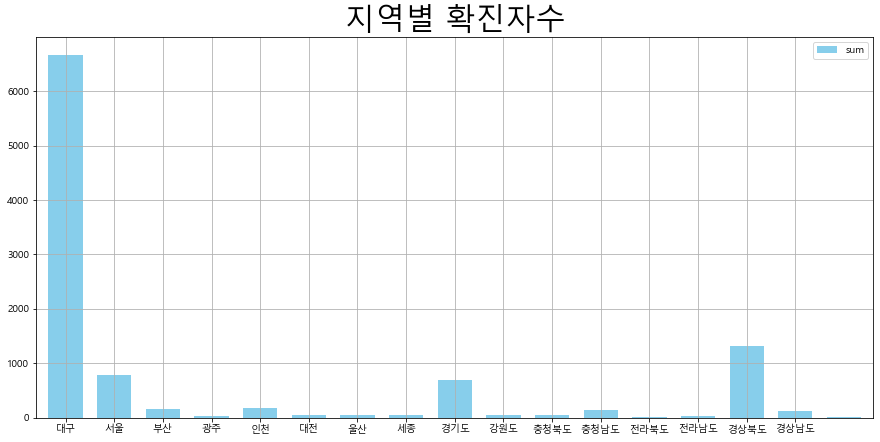

In [87]:
ax = Sum_확진자수.T.plot(kind='bar', figsize=(15, 7), fontsize=10, width=0.7, color='skyblue')
ax.set_xticks([0, 1, 2, 3, 4, 5, 6, 7, 8,9,10,11,12,13,14,15])
ax.set_xticklabels(['대구', '서울', '부산', '광주', '인천', '대전', '울산', '세종', '경기도','강원도', '충청북도', '충청남도', '전라북도', '전라남도', '경상북도', '경상남도', '제주도'])
plt.title('지역별 확진자수', size=30)
plt.grid()
plt.xticks(rotation=0)
plt.show()


In [88]:
case_집단감염 = case1[(case1['집단감염 유무']==True)]
case_개인감염 = case1[(case1['집단감염 유무']==False)]

In [89]:
case_집단감염.head(3)

,질병코드,"주,도",시,집단감염 유무,감염 사례,누적 확진자 수,위도,경도
0,1000001,Seoul,Yongsan-gu,True,Itaewon Clubs,133.0,37.538621,126.992652
1,1000002,Seoul,Guro-gu,True,Guro-gu Call Center,99.0,37.508163,126.884387
2,1000003,Seoul,Dongdaemun-gu,True,Dongan Church,20.0,37.592888,127.056766


In [90]:
case_집단감염_서울 = case_집단감염[(case_집단감염['주,도']=='Seoul')]
case_집단감염_대구 = case_집단감염[(case_집단감염['주,도']=='Daegu')]
case_집단감염_부산 = case_집단감염[(case_집단감염['주,도']=='Busan')]
case_집단감염_광주 = case_집단감염[(case_집단감염['주,도']=='Gwangju')]
case_집단감염_인천 = case_집단감염[(case_집단감염['주,도']=='Incheon')]
case_집단감염_대전 = case_집단감염[(case_집단감염['주,도']=='Daejeon')]
case_집단감염_울산 = case_집단감염[(case_집단감염['주,도']=='Ulsan')]
case_집단감염_세종 = case_집단감염[(case_집단감염['주,도']=='Sejong')]
case_집단감염_경기도 = case_집단감염[(case_집단감염['주,도']=='Gyeonggi-do')]
case_집단감염_강원도 = case_집단감염[(case_집단감염['주,도']=='Gangwon-do')]
case_집단감염_충북 = case_집단감염[(case_집단감염['주,도']=='Chungcheongbuk-do')]
case_집단감염_충남 = case_집단감염[(case_집단감염['주,도']=='Chungcheongnam-do')]
case_집단감염_전북 = case_집단감염[(case_집단감염['주,도']=='Jeollabuk-do')]
case_집단감염_전남 = case_집단감염[(case_집단감염['주,도']=='Jeollanam-do')]
case_집단감염_경북 = case_집단감염[(case_집단감염['주,도']=='Gyeongsangbuk-do')]
case_집단감염_경남 = case_집단감염[(case_집단감염['주,도']=='Gyeongsangnam-do')]
case_집단감염_제주 = case_집단감염[(case_집단감염['주,도']=='Jeju-do')]

In [91]:
Sum_집단감염_지역 = pd.DataFrame(index=['sum'])
Sum_집단감염_지역['서울'] = case_집단감염_서울['누적 확진자 수'].sum(axis=0)
Sum_집단감염_지역['대구'] = case_집단감염_대구['누적 확진자 수'].sum(axis=0)
Sum_집단감염_지역['부산'] = case_집단감염_부산['누적 확진자 수'].sum(axis=0)
Sum_집단감염_지역['광주'] = case_집단감염_광주['누적 확진자 수'].sum(axis=0)
Sum_집단감염_지역['인천'] = case_집단감염_인천['누적 확진자 수'].sum(axis=0)
Sum_집단감염_지역['대전'] = case_집단감염_대전['누적 확진자 수'].sum(axis=0)
Sum_집단감염_지역['울산'] = case_집단감염_울산['누적 확진자 수'].sum(axis=0)
Sum_집단감염_지역['세종'] = case_집단감염_세종['누적 확진자 수'].sum(axis=0)
Sum_집단감염_지역['경기도'] = case_집단감염_경기도['누적 확진자 수'].sum(axis=0)
Sum_집단감염_지역['강원도'] = case_집단감염_강원도['누적 확진자 수'].sum(axis=0)
Sum_집단감염_지역['충북'] = case_집단감염_충북['누적 확진자 수'].sum(axis=0)
Sum_집단감염_지역['충남'] = case_집단감염_충남['누적 확진자 수'].sum(axis=0)
Sum_집단감염_지역['전북'] = case_집단감염_전북['누적 확진자 수'].sum(axis=0)
Sum_집단감염_지역['전남'] = case_집단감염_전남['누적 확진자 수'].sum(axis=0)
Sum_집단감염_지역['경북'] = case_집단감염_경북['누적 확진자 수'].sum(axis=0)
Sum_집단감염_지역['경남'] = case_집단감염_경남['누적 확진자 수'].sum(axis=0)
Sum_집단감염_지역['제주'] = case_집단감염_제주['누적 확진자 수'].sum(axis=0)

In [92]:
Sum_집단감염_지역

,서울,대구,부산,광주,인천,대전,울산,세종,경기도,강원도,충북,충남,전북,전남,경북,경남,제주
sum,379.0,4976.0,71.0,9.0,117.0,7.0,16.0,39.0,342.0,30.0,17.0,112.0,1.0,3.0,978.0,76.0,1.0


In [126]:
Sum_집단감염TOP5 = Sum_집단감염_지역.T.sort_values(by=['sum'],axis=0,ascending=False).head(5)

In [127]:
Sum_집단감염TOP5

,sum
대구,4976.0
경북,978.0
서울,379.0
경기도,342.0
인천,117.0


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  


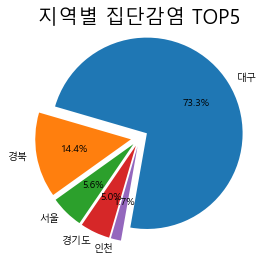

In [131]:
ratio = Sum_집단감염TOP5
casee = ['대구','경북','서울','경기도','인천']
plt.title('지역별 집단감염 TOP5', size=20)
explode=(0.1,0.1,0.1,0.1,0.1)

plt.pie(ratio, labels=casee, autopct='%.1f%%',explode=explode,startangle=260,  radius=1.1)
plt.show()

In [132]:
Sum_집단감염 = pd.DataFrame(index=['sum'])
Sum_집단감염['집단감염'] = case_집단감염['누적 확진자 수'].sum(axis=0)
Sum_집단감염['개인감염'] = case_개인감염['누적 확진자 수'].sum(axis=0)

In [133]:
Sum_집단감염

,집단감염,개인감염
sum,7174.0,3190.0


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  


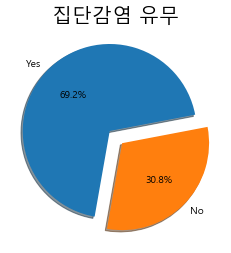

In [134]:
ratio = Sum_집단감염
casee = ['Yes','No']
plt.title('집단감염 유무', size=20)
explode = [0.10, 0.10]

plt.pie(ratio, labels=casee, autopct='%.1f%%', startangle=260, counterclock=False, explode=explode, shadow=True, radius=1)
plt.show()

In [135]:
list(case1['감염 사례'].unique())

['Itaewon Clubs',
 'Guro-gu Call Center',
 'Dongan Church',
 'Manmin Central Church',
 "Eunpyeong St. Mary's Hospital",
 'Seongdong-gu APT',
 'Jongno Community Center',
 'Samsung Medical Center',
 'Jung-gu Fashion Company',
 'Yeonana News Class',
 'Korea Campus Crusade of Christ',
 'Coupang Logistics Center',
 'Shincheonji Church',
 'Guri Collective Infection',
 'KB Life Insurance',
 'Yeongdeungpo Learning Institute',
 'overseas inflow',
 'contact with patient',
 'etc',
 'Onchun Church',
 'Suyeong-gu Kindergarten',
 'Haeundae-gu Catholic Church',
 'Jin-gu Academy',
 'Cheongdo Daenam Hospital',
 'Second Mi-Ju Hospital',
 'Hansarang Convalescent Hospital',
 'Daesil Convalescent Hospital',
 'Fatima Hospital',
 'Korea Forest Engineer Institute',
 'Seosan-si Laboratory',
 'Ministry of Oceans and Fisheries',
 'gym facility in Sejong',
 'River of Grace Community Church',
 'Uijeongbu St. Mary’s Hospital',
 'Bundang Jesaeng Hospital',
 'Suwon Saeng Myeong Saem Church',
 'Wonju-si Apartments',
 

In [136]:
case_이태원클럽 = case1[(case1['감염 사례']=='Itaewon Clubs')]
case_구로구콜센터 = case1[(case1['감염 사례']=='Guro-gu Call Center')]
case_동안교회 = case1[(case1['감염 사례']=='Dongan Church')]
case_만민중앙교회 = case1[(case1['감염 사례']=='Manmin Central Church')]
case_은평성모병원 = case1[(case1['감염 사례']=="Eunpyeong St. Mary's Hospital")]
case_종로주민센터 = case1[(case1['감염 사례']=='Jongno Community Center')]
case_삼성서울병원 = case1[(case1['감염 사례']=='Samsung Medical Center')]
case_중구패션컴퍼니 = case1[(case1['감염 사례']=='Jung-gu Fashion Company')]
case_연나뉴스교실 = case1[(case1['감염 사례']== 'Yeonana News Class')]
case_십자군교회 = case1[(case1['감염 사례']=='Korea Campus Crusade of Christ')]
case_쿠팡물류센터 = case1[(case1['감염 사례']=='Coupang Logistics Center')]
case_신천지교회 = case1[(case1['감염 사례']=='Shincheonji Church')]
case_구리집단감염 = case1[(case1['감염 사례']=='Guri Collective Infection')]
case_KB생명 = case1[(case1['감염 사례']=='KB Life Insurance')]
case_영등포학습원 = case1[(case1['감염 사례']=='Yeongdeungpo Learning Institute')]
case_해외유입 = case1[(case1['감염 사례']=='overseas inflow')]
case_환자와의접촉 = case1[(case1['감염 사례']=='contact with patient')]
case_기타등등 = case1[(case1['감염 사례']=='etc')]
case_온천교회 = case1[(case1['감염 사례']=='Onchun Church')]
case_수영구유치원 = case1[(case1['감염 사례']=='Suyeong-gu Kindergarten')]
case_해운대구성당 = case1[(case1['감염 사례']=='Haeundae-gu Catholic Church')]
case_진구아카데미 = case1[(case1['감염 사례']=='Jin-gu Academy')]
case_청도대남병원 = case1[(case1['감염 사례']=='Cheongdo Daenam Hospital')]
case_제2미주병원 = case1[(case1['감염 사례']=='Second Mi-Ju Hospital')]
case_한사랑요양병원 = case1[(case1['감염 사례']=='Hansarang Convalescent Hospital')]
case_대실요양병원 = case1[(case1['감염 사례']=='Daesil Convalescent Hospital')]
case_파티마병원 = case1[(case1['감염 사례']=='Fatima Hospital')]
case_한국산림기술원 = case1[(case1['감염 사례']=='Korea Forest Engineer Institute')]
case_서산시연구실 = case1[(case1['감염 사례']== 'Seosan-si Laboratory')]
case_해양수산부 = case1[(case1['감염 사례']=='Ministry of Oceans and Fisheries')]
case_세종시체육시설 = case1[(case1['감염 사례']=='gym facility in Sejong')]
case_그레이스강커뮤니티교회 = case1[(case1['감염 사례']=='River of Grace Community Church')]
case_의정부성모병원 = case1[(case1['감염 사례']=='Uijeongbu St. Mary’s Hospital')]
case_분당재생병원 = case1[(case1['감염 사례']=='Bundang Jesaeng Hospital')]
case_수원생명샘교회 = case1[(case1['감염 사례']=='Suwon Saeng Myeong Saem Church')]
case_원주시아파트 = case1[(case1['감염 사례']=='Wonju-si Apartments')]
case_괴산군장연면 = case1[(case1['감염 사례']=='Goesan-gun Jangyeon-myeon')]
case_천안체육관시설 = case1[(case1['감염 사례']=='gym facility in Cheonan')]
case_봉화푸른요양원 = case1[(case1['감염 사례']=='Bonghwa Pureun Nursing Home')]
case_이스라엘순례 = case1[(case1['감염 사례']=='Pilgrimage to Israel')]
case_밀랄쉼터 = case1[(case1['감염 사례']== 'Milal Shelter')]
case_경산서린요양원 = case1[(case1['감염 사례']=='Gyeongsan Seorin Nursing Home')]
case_예천군 = case1[(case1['감염 사례']=='Yechun-gun')]
case_경산제일실버타운 = case1[(case1['감염 사례']=='Gyeongsan Jeil Silver Town')]
case_경산참조은센터 = case1[(case1['감염 사례']=='Gyeongsan Cham Joeun Community Center')]
case_거창교회 = case1[(case1['감염 사례']=='Geochang Church')]
case_거창군웅양면 = case1[(case1['감염 사례']=='Geochang-gun Woongyang-myeon')]
case_윙스타워 = case1[(case1['감염 사례']=='Wings Tower')]
case_한마음창원병원 = case1[(case1['감염 사례']=='Hanmaeum Changwon Hospital')]
case_창녕코인노래방 = case1[(case1['감염 사례']=='Changnyeong Coin Karaoke')]

In [137]:
Sum_감염경로 = pd.DataFrame(index=['sum'])
Sum_감염경로['이태원클럽'] = case_이태원클럽['누적 확진자 수'].sum(axis=0)
Sum_감염경로['구로구콜센터'] = case_구로구콜센터['누적 확진자 수'].sum(axis=0)
Sum_감염경로['동안교회'] = case_동안교회['누적 확진자 수'].sum(axis=0)
Sum_감염경로['만민중앙교회'] = case_만민중앙교회['누적 확진자 수'].sum(axis=0)
Sum_감염경로['은평성모병원'] = case_은평성모병원['누적 확진자 수'].sum(axis=0)
Sum_감염경로['종로주민센터'] = case_종로주민센터['누적 확진자 수'].sum(axis=0)
Sum_감염경로['삼성서울병원'] = case_삼성서울병원['누적 확진자 수'].sum(axis=0)
Sum_감염경로['중구패션컴퍼니'] = case_중구패션컴퍼니['누적 확진자 수'].sum(axis=0)
Sum_감염경로['연나뉴스교실'] = case_연나뉴스교실['누적 확진자 수'].sum(axis=0)
Sum_감염경로['십자군교회'] = case_십자군교회['누적 확진자 수'].sum(axis=0)
Sum_감염경로['쿠팡물류센터'] = case_쿠팡물류센터['누적 확진자 수'].sum(axis=0)
Sum_감염경로['신천지교회'] = case_신천지교회['누적 확진자 수'].sum(axis=0)
Sum_감염경로['구리집단감염'] = case_구리집단감염['누적 확진자 수'].sum(axis=0)
Sum_감염경로['KB생명'] = case_KB생명['누적 확진자 수'].sum(axis=0)
Sum_감염경로['영등포학습원'] = case_영등포학습원['누적 확진자 수'].sum(axis=0)
Sum_감염경로['해외유입'] = case_해외유입['누적 확진자 수'].sum(axis=0)
Sum_감염경로['환자와의접촉'] = case_환자와의접촉['누적 확진자 수'].sum(axis=0)
Sum_감염경로['온천교회'] = case_온천교회['누적 확진자 수'].sum(axis=0)
Sum_감염경로['수영구유치원'] = case_수영구유치원['누적 확진자 수'].sum(axis=0)
Sum_감염경로['해운대구성당'] = case_해운대구성당['누적 확진자 수'].sum(axis=0)
Sum_감염경로['진구아카데미'] = case_진구아카데미['누적 확진자 수'].sum(axis=0)
Sum_감염경로['청도대남병원'] = case_청도대남병원['누적 확진자 수'].sum(axis=0)
Sum_감염경로['제2미주병원'] = case_제2미주병원['누적 확진자 수'].sum(axis=0)
Sum_감염경로['한사랑요양병원'] = case_한사랑요양병원['누적 확진자 수'].sum(axis=0)
Sum_감염경로['대실요양병원'] = case_대실요양병원['누적 확진자 수'].sum(axis=0)
Sum_감염경로['파티마병원'] = case_파티마병원['누적 확진자 수'].sum(axis=0)
Sum_감염경로['한국산림기술원'] = case_한국산림기술원['누적 확진자 수'].sum(axis=0)
Sum_감염경로['서산시연구실'] = case_서산시연구실['누적 확진자 수'].sum(axis=0)
Sum_감염경로['해양수산부'] = case_해양수산부['누적 확진자 수'].sum(axis=0)
Sum_감염경로['세종시체육시설'] = case_세종시체육시설['누적 확진자 수'].sum(axis=0)
Sum_감염경로['그레이스강커뮤니티교회'] = case_그레이스강커뮤니티교회['누적 확진자 수'].sum(axis=0)
Sum_감염경로['의정부성모병원'] = case_의정부성모병원['누적 확진자 수'].sum(axis=0)
Sum_감염경로['분당재생병원'] = case_분당재생병원['누적 확진자 수'].sum(axis=0)
Sum_감염경로['수원생명샘교회'] = case_수원생명샘교회['누적 확진자 수'].sum(axis=0)
Sum_감염경로['원주시아파트'] = case_원주시아파트['누적 확진자 수'].sum(axis=0)
Sum_감염경로['괴산군장연면'] = case_괴산군장연면['누적 확진자 수'].sum(axis=0)
Sum_감염경로['천안체육관시설'] = case_천안체육관시설['누적 확진자 수'].sum(axis=0)
Sum_감염경로['봉화푸른요양원'] = case_봉화푸른요양원['누적 확진자 수'].sum(axis=0)
Sum_감염경로['이스라엘순례'] = case_이스라엘순례['누적 확진자 수'].sum(axis=0)
Sum_감염경로['밀랄쉼터'] = case_밀랄쉼터['누적 확진자 수'].sum(axis=0)
Sum_감염경로['경산서린요양원'] = case_경산서린요양원['누적 확진자 수'].sum(axis=0)
Sum_감염경로['예천군'] = case_예천군['누적 확진자 수'].sum(axis=0)
Sum_감염경로['경산제일실버타운'] = case_경산제일실버타운['누적 확진자 수'].sum(axis=0)
Sum_감염경로['경산참조은센터'] = case_경산참조은센터['누적 확진자 수'].sum(axis=0)
Sum_감염경로['거창교회'] = case_거창교회['누적 확진자 수'].sum(axis=0)
Sum_감염경로['거창군웅양면'] = case_거창군웅양면['누적 확진자 수'].sum(axis=0)
Sum_감염경로['윙스타워'] = case_윙스타워['누적 확진자 수'].sum(axis=0)
Sum_감염경로['한마음창원병원'] = case_한마음창원병원['누적 확진자 수'].sum(axis=0)
Sum_감염경로['창녕코인노래방'] = case_창녕코인노래방['누적 확진자 수'].sum(axis=0)

In [138]:
Sum_감염경로

,이태원클럽,구로구콜센터,동안교회,만민중앙교회,은평성모병원,종로주민센터,삼성서울병원,중구패션컴퍼니,연나뉴스교실,십자군교회,...,밀랄쉼터,경산서린요양원,예천군,경산제일실버타운,경산참조은센터,거창교회,거창군웅양면,윙스타워,한마음창원병원,창녕코인노래방
sum,253.0,167.0,20.0,43.0,14.0,10.0,7.0,7.0,4.0,8.0,...,36.0,66.0,40.0,17.0,16.0,10.0,8.0,10.0,7.0,7.0


In [139]:
Sum_감염경로TOP10 = Sum_감염경로.T.sort_values(by=['sum'],axis=0,ascending=False).head(10)

In [140]:
Sum_감염경로TOP10

,sum
신천지교회,5212.0
환자와의접촉,1236.0
해외유입,886.0
이태원클럽,253.0
제2미주병원,196.0
구로구콜센터,167.0
한사랑요양병원,128.0
청도대남병원,123.0
쿠팡물류센터,109.0
천안체육관시설,103.0


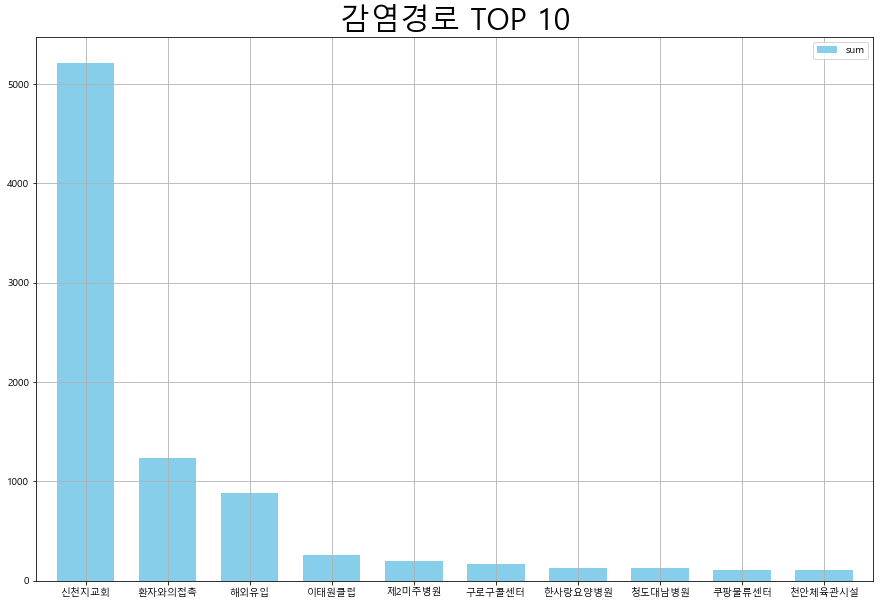

In [141]:
ax = Sum_감염경로TOP10.plot(kind='bar', figsize=(15, 10), fontsize=10, width=0.7, color='skyblue')
plt.title('감염경로 TOP 10', size=30)
plt.grid()
plt.xticks(rotation=0)
plt.show()